**Environment Setup**

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn

**Import Libraries:**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

**Load the CSV Files:**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving forward.csv to forward.csv


In [5]:
import pandas as pd
import io
forward = pd.read_csv(io.StringIO(uploaded['forward.csv'].decode('utf-8')))
#print(forward)

In [9]:
import os

# Function to read multiple CSV files from a directory
def read_csv_files(directory):
    dfs = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Read all CSV files for races from the "Races" folder
races = read_csv_files('/content/Races')

# Read all CSV files for horses from the "Horses" folder
horses = read_csv_files('/content/Horses')

# Display the first few rows of each dataset
display(races.head())
display(horses.head())

<ipython-input-9-044d08f1f8c1>:9: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-9-044d08f1f8c1>:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,286252,Southwell (AW),12:55,05/01/01,"Bet Direct ""Red To Bet"" On ITV Handicap (Div I)",Class 5,0-70,4yo+,6f,Standard,NaN,"[3398.2, 1045.6, 522.8, 261.4]",76.39,5228.0,1206.0,GB,0,5,NaN
1,297504,Cheltenham,02:45,05/01/01,totesport Handicap Hurdle Class B,Class 2,NaN,4yo+,3m,Good,11 hurdles 1 omitted,"[16138.49, 6121.5, 3060.75, 1391.25, 695.63, 4...",368.10,27825.0,4827.0,GB,1,2,NaN
2,305638,Catterick,02:30,05/01/01,Aladdin Handicap Hurdle Class D,Class 3,0-120,4yo+,1m7½f,Good,8 hurdles,"[4849.0, 1492.0, 746.0, 373.0]",229.60,7460.0,3116.5,GB,1,3,NaN
3,321346,Fontwell,02:25,05/01/01,"Betfred ""The Bonus King"" Southern National Han...",Class 3,0-125,5yo+,3m3f,Good To Soft,21 fences,"[12133.6, 4602.4, 2301.2, 1046.0, 523.0, 313.8]",460.50,20920.0,5430.0,GB,10,3,NaN
4,322313,Cheltenham,03:20,05/01/01,Unicoin Homes Chase (Handicap) Class B,Class 2,NaN,5yo+,2m5f,Good,17 fences,"[23200.0, 8800.0, 4400.0, 2000.0, 1000.0, 600.0]",328.50,40000.0,4223.0,GB,1,2,NaN


,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,10312,Waterproof,4.0,9.0,0.076923,0,Shaun Keightley,Brendan Powell,1,NaN,...,NaN,Pour Moi,Laughing Water,Duke Of Marmalade,9,1.199095,66,1.0,1.0,NaN
1,10312,Eva's Diva,6.0,7.0,0.444444,1,Phil Middleton,Mr Sam Lee,2,15,...,110.0,Getaway,Shouette,Sadler's Wells,9,1.199095,65,0.0,1.0,NaN
2,10312,Incredible Dream,7.0,5.0,0.019608,0,Conrad Allen,Joshua Moore,3,5.5,...,NaN,Vale Of York,Finnmark,Halling,9,1.199095,72,0.0,1.0,NaN
3,10312,Hats Off To Larry,6.0,4.0,0.230769,0,Mick Channon,Marc Goldstein,4,10,...,NaN,Sixties Icon,Highland Jig,Norse Dancer,9,1.199095,72,0.0,0.0,NaN
4,10312,Taqwaa,7.0,6.0,0.038462,0,Laura Morgan,Richie McLernon,5,5.5,...,NaN,Iffraaj,Hallowed Park,Barathea,9,1.199095,72,0.0,0.0,NaN


**Data Cleaning**

In [10]:
# Checking for missing values in races DataFrame
races_missing_values = races.isnull().sum()
print("Missing values in Races DataFrame:")
print(races_missing_values)

# Checking for missing values in horses DataFrame
horses_missing_values = horses.isnull().sum()
print("\nMissing values in Horses DataFrame:")
print(horses_missing_values)

# Checking for missing values in forward DataFrame
forward_missing_values = forward.isnull().sum()
print("\nMissing values in Forward DataFrame:")
print(forward_missing_values)

Missing values in Races DataFrame:
rid                 0
course              0
time                0
date                0
title               1
rclass         152992
band           231309
ages            13054
distance            0
condition          48
hurdles        274953
prizes              0
winningTime         0
prize           19708
metric              0
countryCode         0
ncond               0
class               0
currency       387291
dtype: int64

Missing values in Horses DataFrame:
rid                   0
horseName             0
age                 309
saddle           179168
decimalPrice          0
isFav                 0
trainerName        2850
jockeyName          125
position              0
positionL        783662
dist            1074385
weightSt              0
weightLb              0
overWeight      4012988
outHandicap     3994332
headGear        3119695
RPR              864877
TR              1681610
OR              1795263
father             1289
mother           

In [11]:
# Dropping specified columns from races DataFrame
races.drop(columns=['rclass', 'band', 'hurdles', 'currency', 'ages' , 'prize'], inplace=True)

# Dropping specified columns from horses DataFrame
horses.drop(columns=['price', 'headGear', 'TR', 'OR', 'outHandicap', 'overWeight' ,'saddle', 'RPR' , 'dist' , 'positionL' , 'gfather' ,'price'], inplace=True)

# Dropping specified columns from forward DataFrame
forward.drop(columns=['OR', 'TRc', 'RPRc', 'rclass'], inplace=True)

In [12]:
# Calculate the mode of the 'condition' column
mode_condition = races['condition'].mode()[0]

# Fill null values in the 'condition' column with the mode value
races['condition'].fillna(mode_condition, inplace=True)

In [13]:
# Fill null values in the 'age' column using mean
mean_age = horses['age'].mean()
horses['age'].fillna(mean_age, inplace=True)

# Fill null values in the specified columns using mode
mode_columns = ['mother', 'father', 'jockeyName', 'trainerName']
for column in mode_columns:
    mode_value = horses[column].mode()[0]
    horses[column].fillna(mode_value, inplace=True)

In [14]:
# Fill null values in the specified columns using mode
mode_columns = ['course', 'condition', 'jockeyName']
for column in mode_columns:
    mode_value = forward[column].mode()[0]
    forward[column].fillna(mode_value, inplace=True)

In [15]:
# Checking for missing values in races DataFrame
races_missing_values = races.isnull().sum()
print("Missing values in Races DataFrame:")
print(races_missing_values)

# Checking for missing values in horses DataFrame
horses_missing_values = horses.isnull().sum()
print("\nMissing values in Horses DataFrame:")
print(horses_missing_values)

# Checking for missing values in forward DataFrame
forward_missing_values = forward.isnull().sum()
print("\nMissing values in Forward DataFrame:")
print(forward_missing_values)

Missing values in Races DataFrame:
rid            0
course         0
time           0
date           0
title          1
distance       0
condition      0
prizes         0
winningTime    0
metric         0
countryCode    0
ncond          0
class          0
dtype: int64

Missing values in Horses DataFrame:
rid             0
horseName       0
age             0
decimalPrice    0
isFav           0
trainerName     0
jockeyName      0
position        0
weightSt        0
weightLb        0
father          0
mother          0
runners         0
margin          0
weight          0
res_win         0
res_place       0
dtype: int64

Missing values in Forward DataFrame:
course          0
countryCode     0
marketTime      0
title           0
runners         0
condition       0
prize           0
horseName       0
trainerName     0
jockeyName      0
weightSt        0
weightLb        0
age             0
decimalPrice    0
dtype: int64


**Merge Datasets:**

In [16]:
# Merge the race and horse datasets on the 'rid' column
merged_data = pd.merge(races, horses, on='rid')

In [17]:
column_names = merged_data.columns
print(column_names)

Index(['rid', 'course', 'time', 'date', 'title', 'distance', 'condition',
       'prizes', 'winningTime', 'metric', 'countryCode', 'ncond', 'class',
       'horseName', 'age', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'weightSt', 'weightLb', 'father', 'mother',
       'runners', 'margin', 'weight', 'res_win', 'res_place'],
      dtype='object')


**Exploratory Data Analysis (EDA)**

In [18]:
# Descriptive statistics
print(merged_data.describe())

                rid   winningTime        metric         class           age  \
count  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06   
mean   2.079191e+05  1.760163e+02  2.489754e+03  2.521013e+00  4.913815e+00   
std    1.199290e+05  1.039372e+02  1.213905e+03  2.375500e+00  2.246027e+00   
min    0.000000e+00  0.000000e+00  8.040000e+02  0.000000e+00 -1.700000e+01   
25%    1.036025e+05  8.850000e+01  1.407000e+03  0.000000e+00  3.000000e+00   
50%    2.086340e+05  1.314800e+02  2.011000e+03  3.000000e+00  4.000000e+00   
75%    3.117560e+05  2.539000e+02  3.318500e+03  5.000000e+00  6.000000e+00   
max    4.150900e+05  5.552530e+03  7.340500e+03  7.000000e+00  2.700000e+01   

       decimalPrice         isFav      position      weightSt      weightLb  \
count  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06   
mean   1.175573e-01  1.044334e-01  8.532958e+00  9.237648e+00  6.141118e+00   
std    1.140435e-01  3.058220e-01  9.464667e+00  1.

In [19]:
merged_data.head()

,rid,course,time,date,title,distance,condition,prizes,winningTime,metric,...,position,weightSt,weightLb,father,mother,runners,margin,weight,res_win,res_place
0,286252,Southwell (AW),12:55,05/01/01,"Bet Direct ""Red To Bet"" On ITV Handicap (Div I)",6f,Standard,"[3398.2, 1045.6, 522.8, 261.4]",76.39,1206.0,...,1,8,8,Lit De Justice,Olden Lek,11,1.171225,54,1.0,1.0
1,286252,Southwell (AW),12:55,05/01/01,"Bet Direct ""Red To Bet"" On ITV Handicap (Div I)",6f,Standard,"[3398.2, 1045.6, 522.8, 261.4]",76.39,1206.0,...,2,8,8,Mind Games,Northern Sal,11,1.171225,54,0.0,1.0
2,286252,Southwell (AW),12:55,05/01/01,"Bet Direct ""Red To Bet"" On ITV Handicap (Div I)",6f,Standard,"[3398.2, 1045.6, 522.8, 261.4]",76.39,1206.0,...,3,9,1,Tagula,Zazu,11,1.171225,57,0.0,1.0
3,286252,Southwell (AW),12:55,05/01/01,"Bet Direct ""Red To Bet"" On ITV Handicap (Div I)",6f,Standard,"[3398.2, 1045.6, 522.8, 261.4]",76.39,1206.0,...,4,8,13,Cadeaux Genereux,Across The Ice,11,1.171225,56,0.0,0.0
4,286252,Southwell (AW),12:55,05/01/01,"Bet Direct ""Red To Bet"" On ITV Handicap (Div I)",6f,Standard,"[3398.2, 1045.6, 522.8, 261.4]",76.39,1206.0,...,5,8,5,Inchinor,Lamarita,11,1.171225,53,0.0,0.0


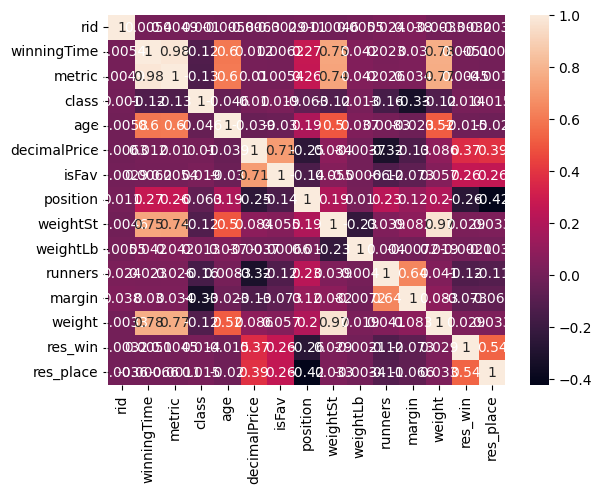

In [20]:
# Exclude non-numeric columns
numeric_columns = merged_data.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

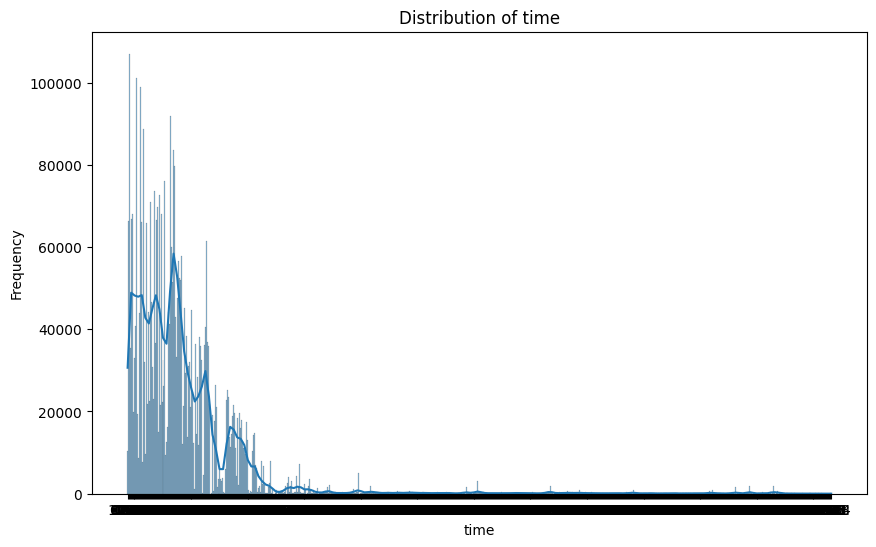

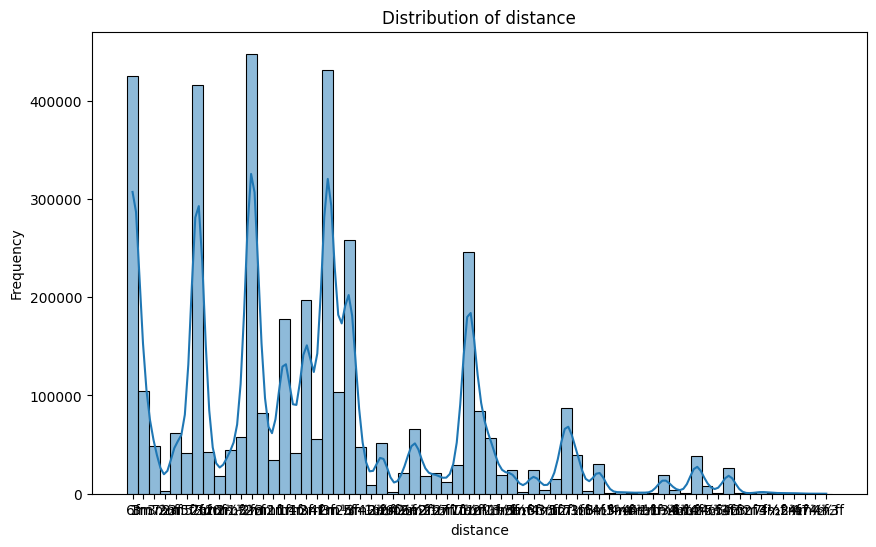

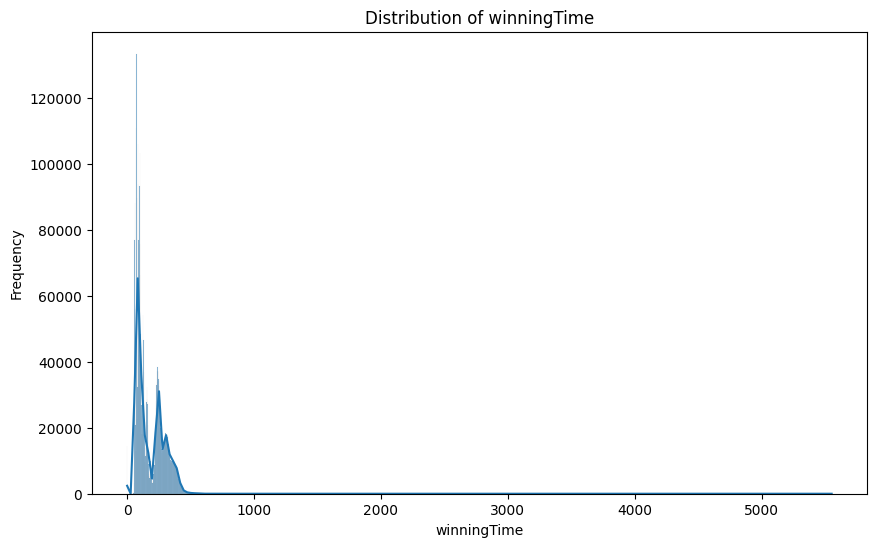

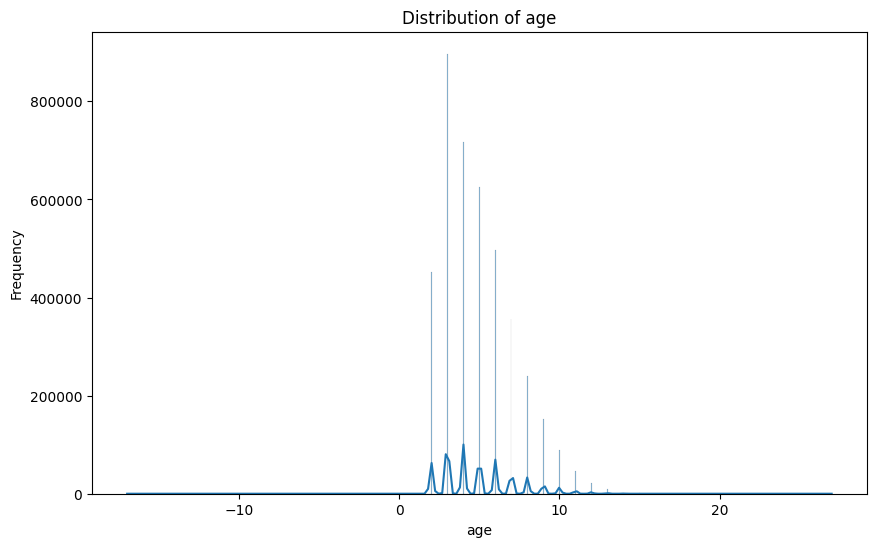

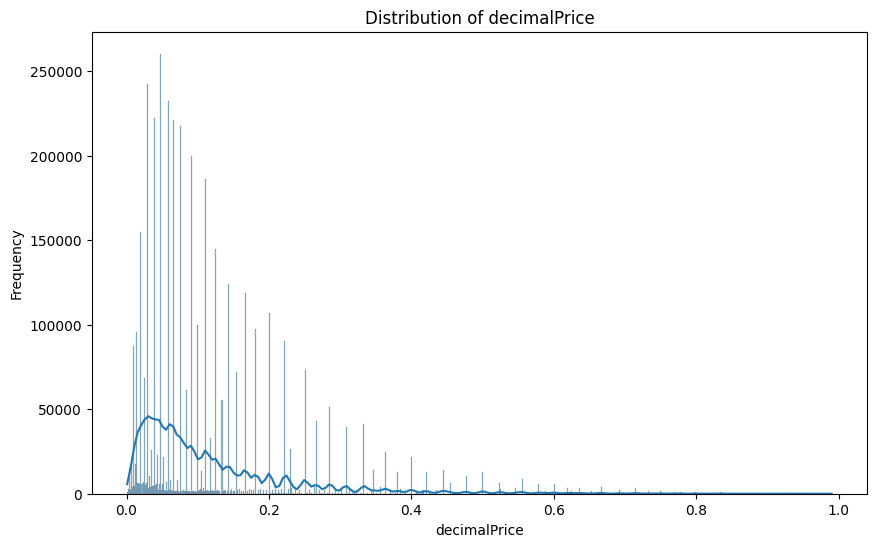

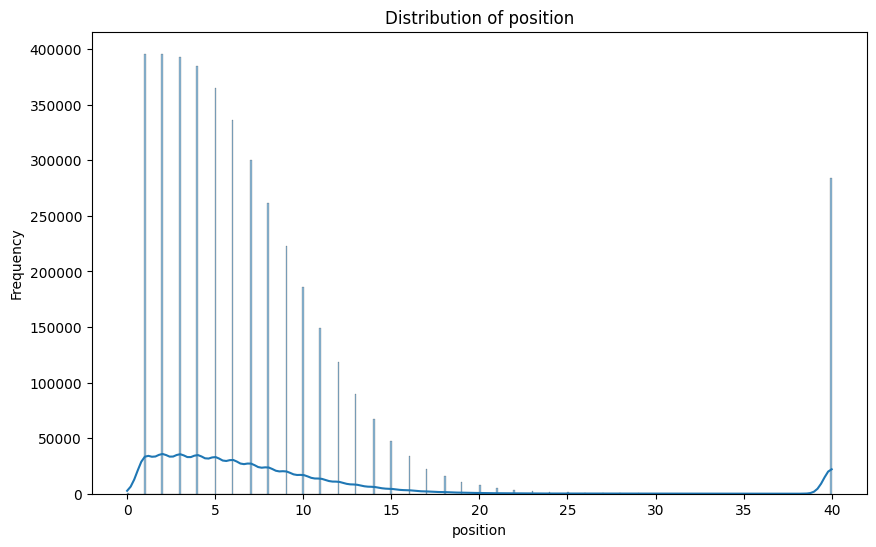

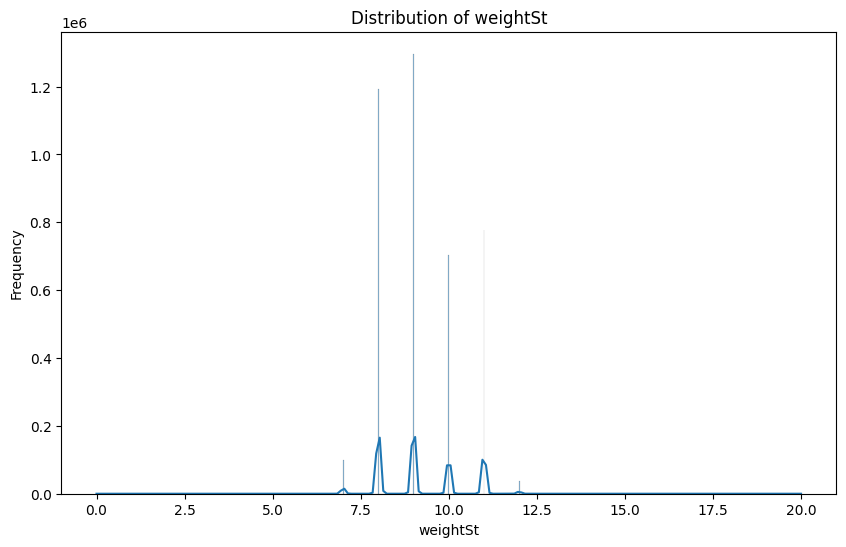

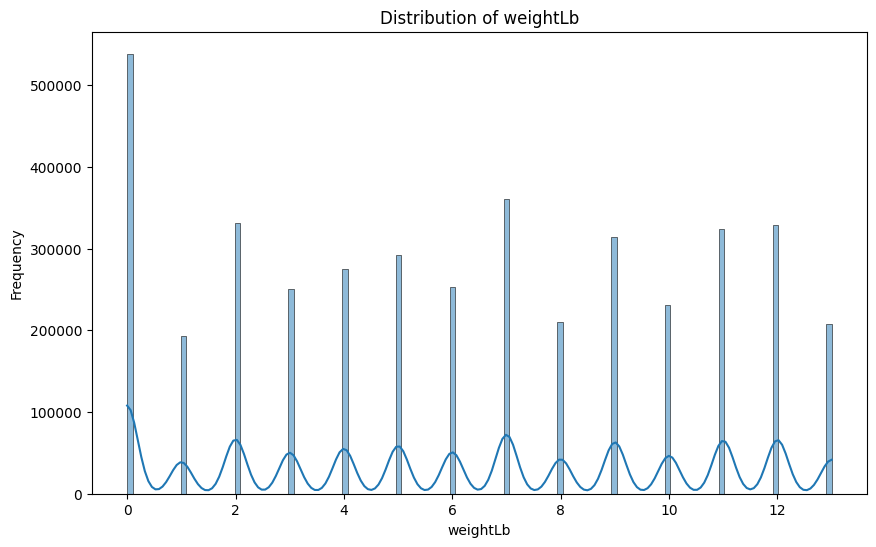

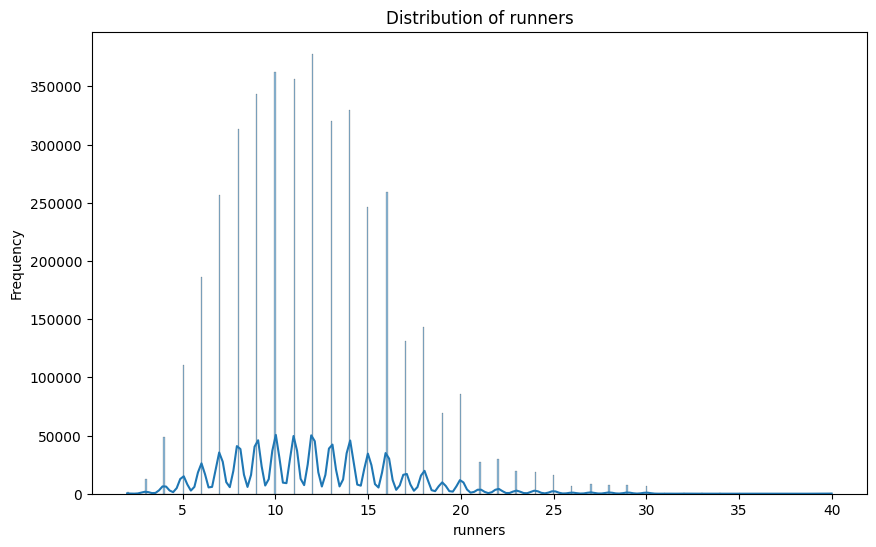

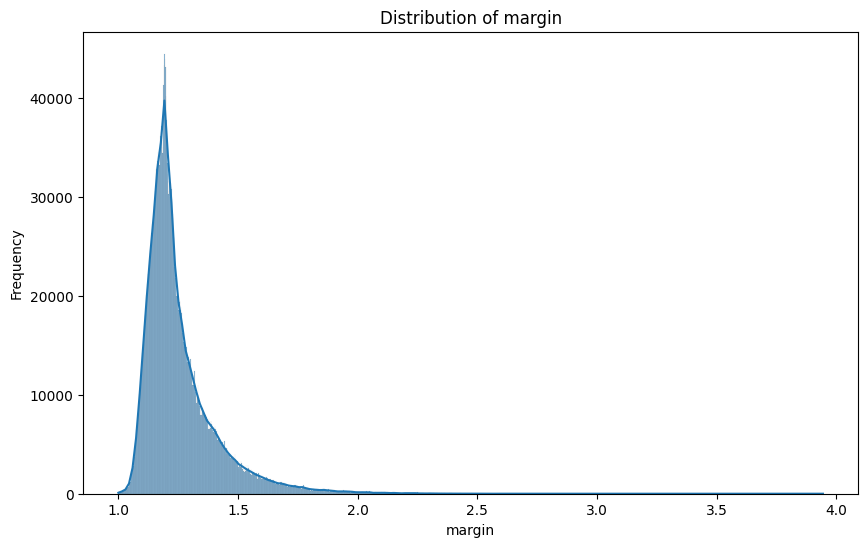

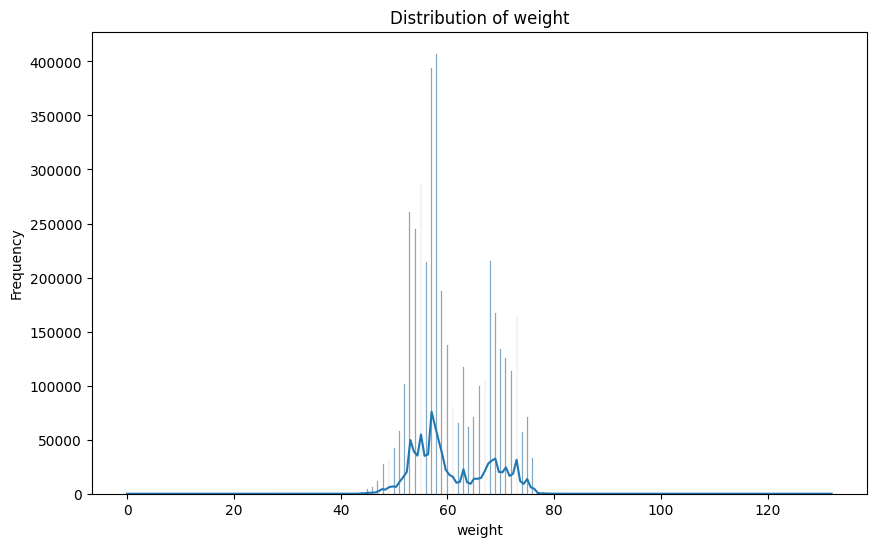

In [21]:
# Assuming merged_data is your DataFrame
continuous_vars = ['time', 'distance', 'winningTime', 'age', 'decimalPrice', 'position', 'weightSt', 'weightLb', 'runners', 'margin', 'weight']

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

**Scatter Plots, Histograms, and Box Plots to Visualize Data Distribution**

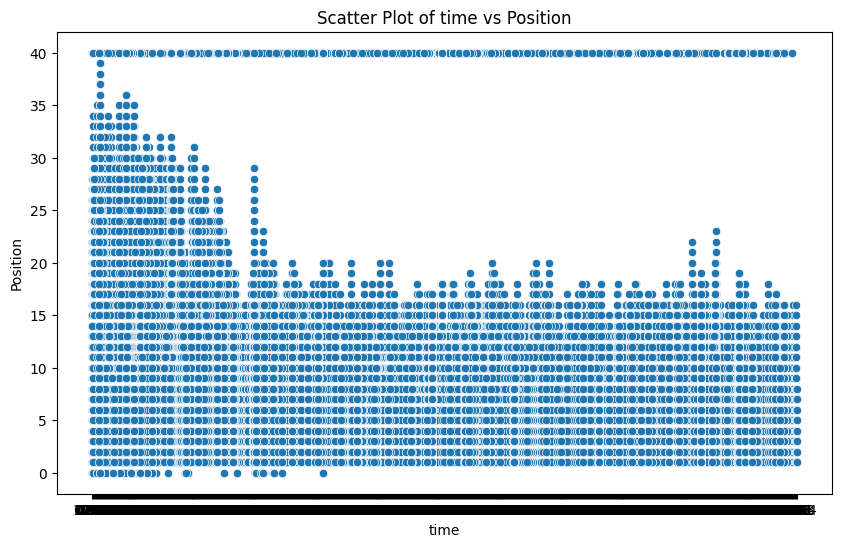

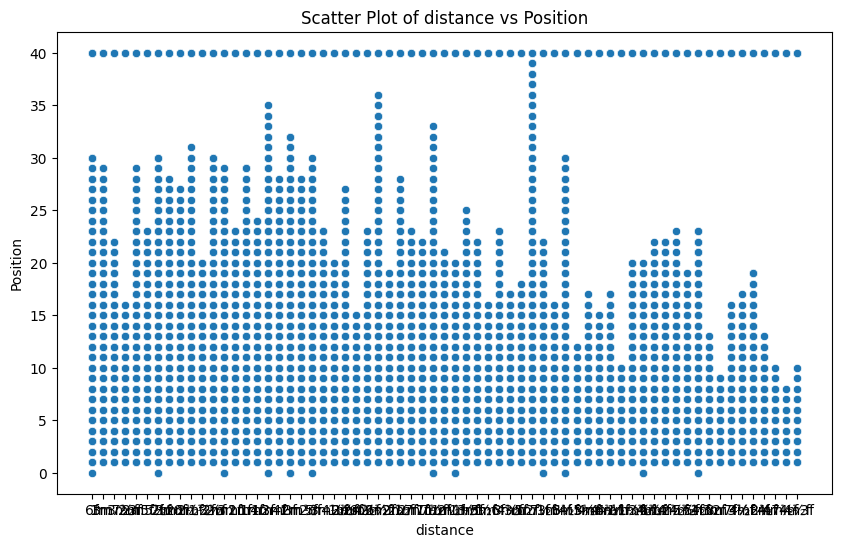

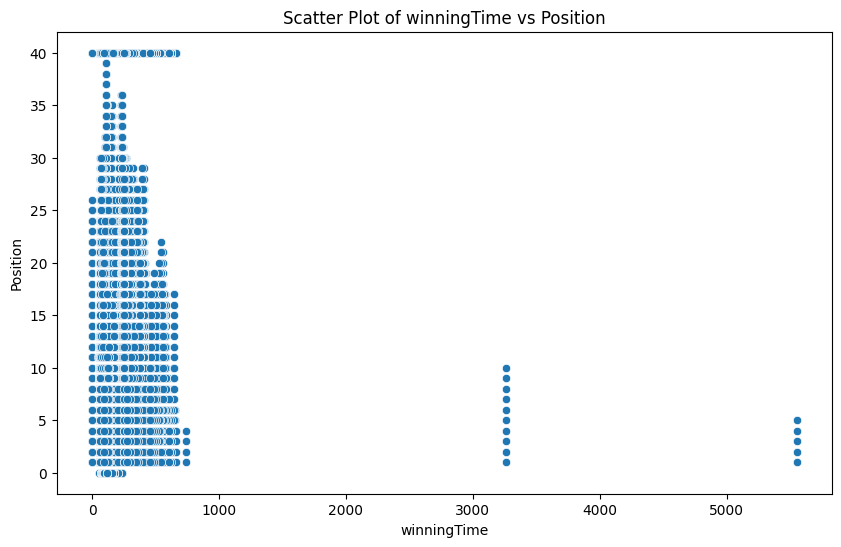

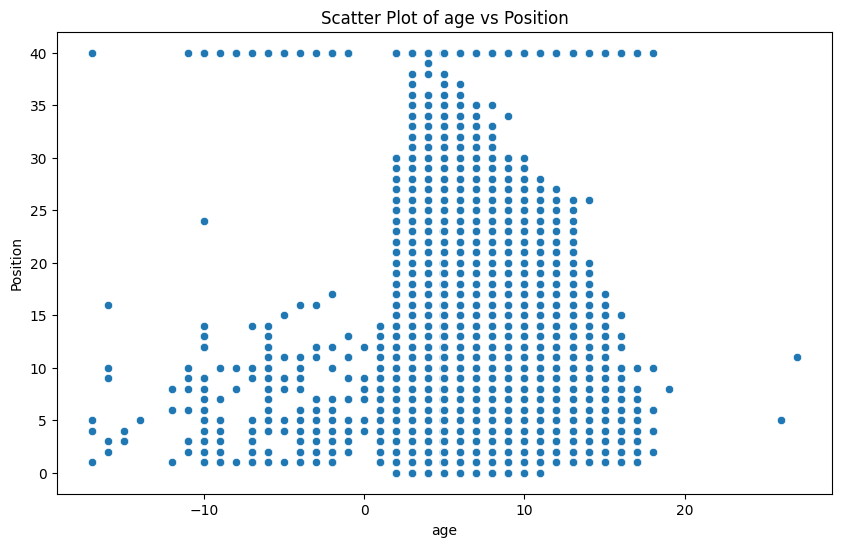

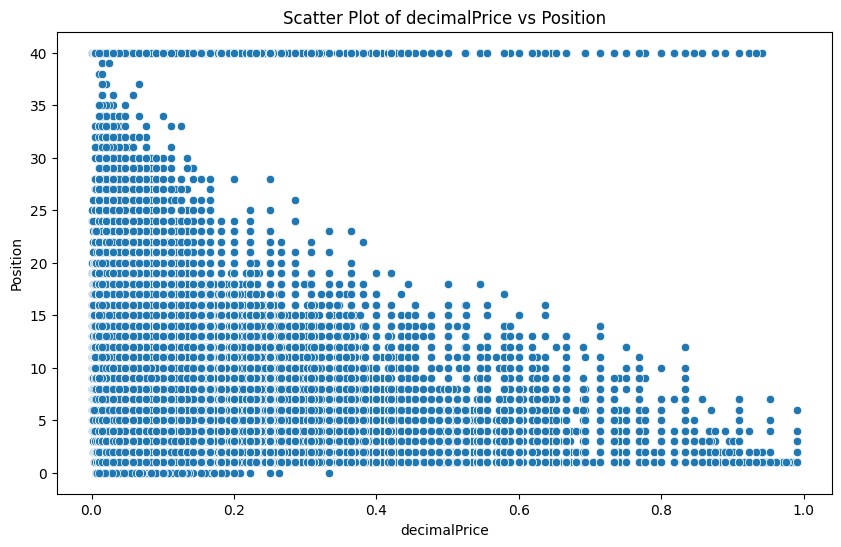

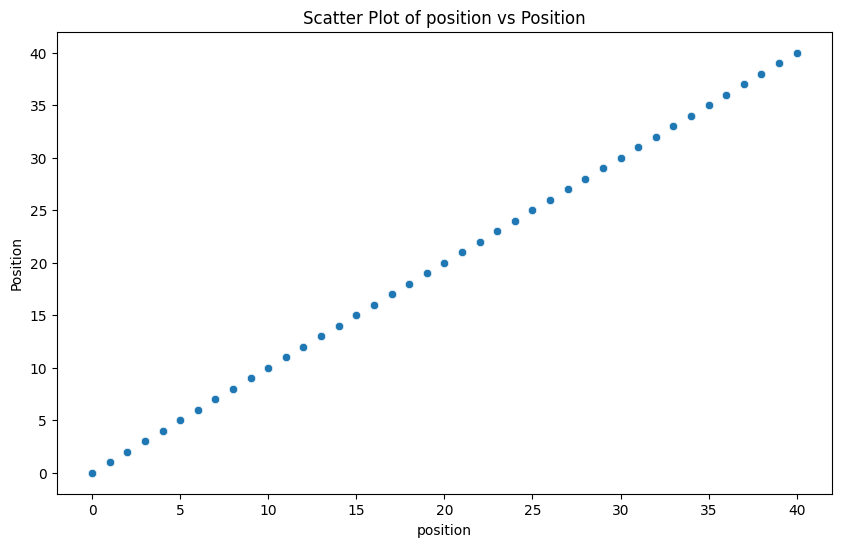

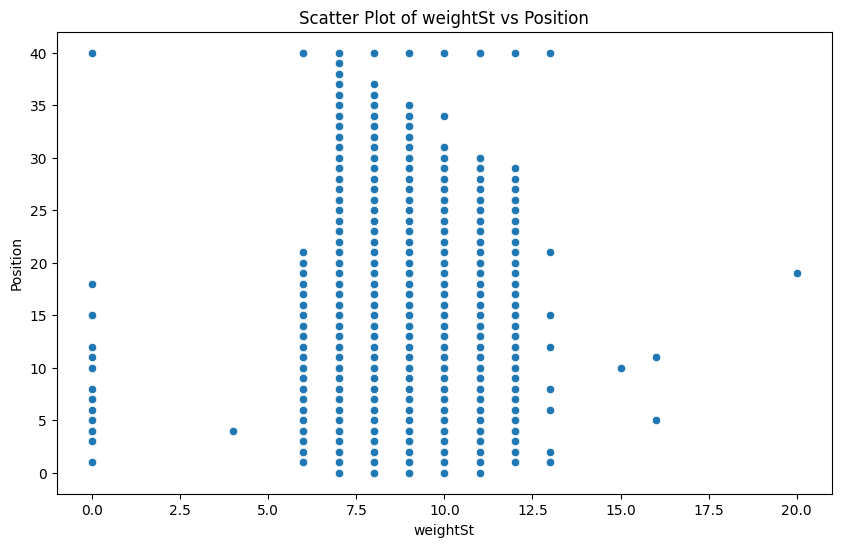

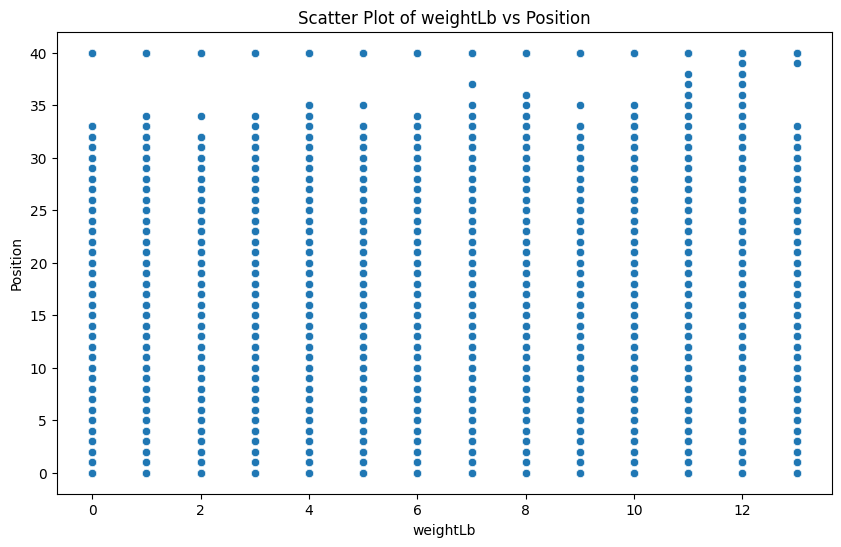

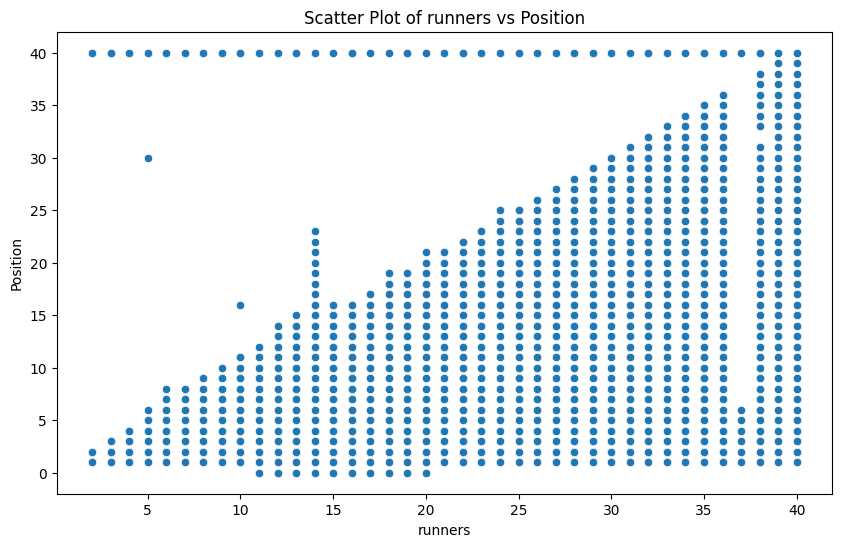

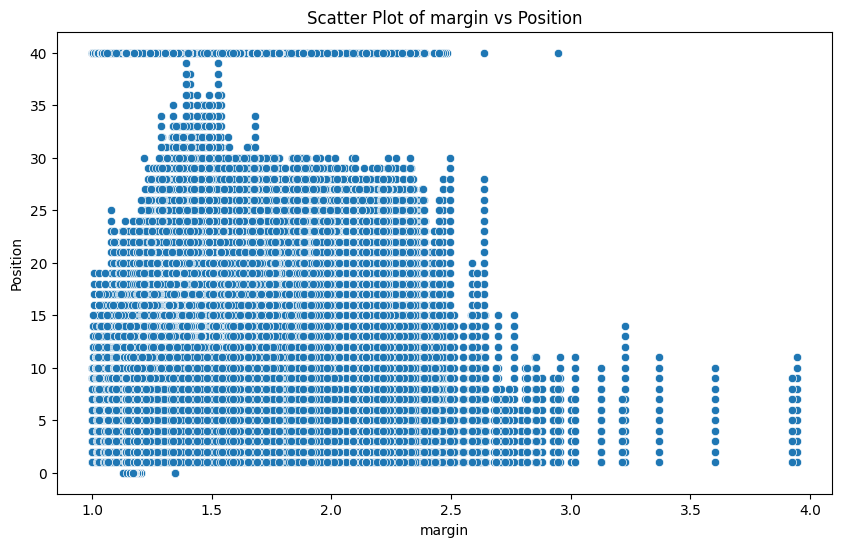

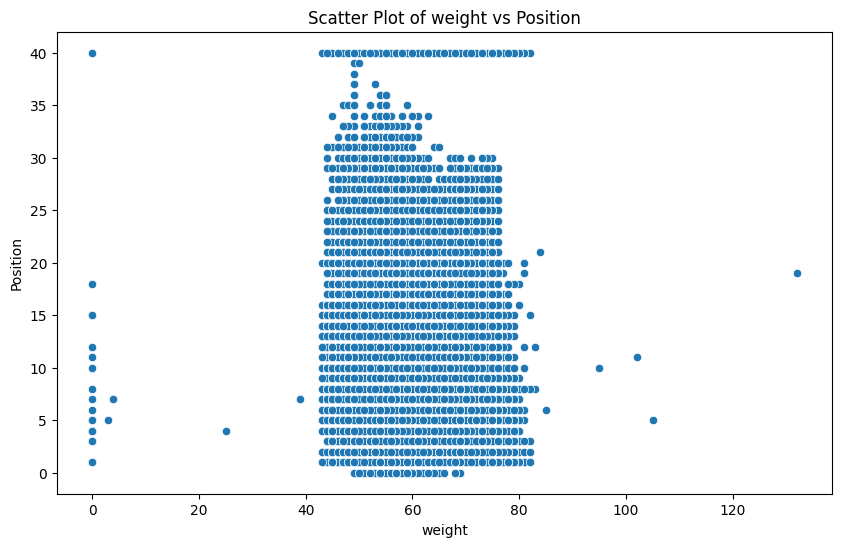

In [22]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=merged_data[var], y=merged_data['position'])
    plt.title(f'Scatter Plot of {var} vs Position')
    plt.xlabel(var)
    plt.ylabel('Position')
    plt.show()

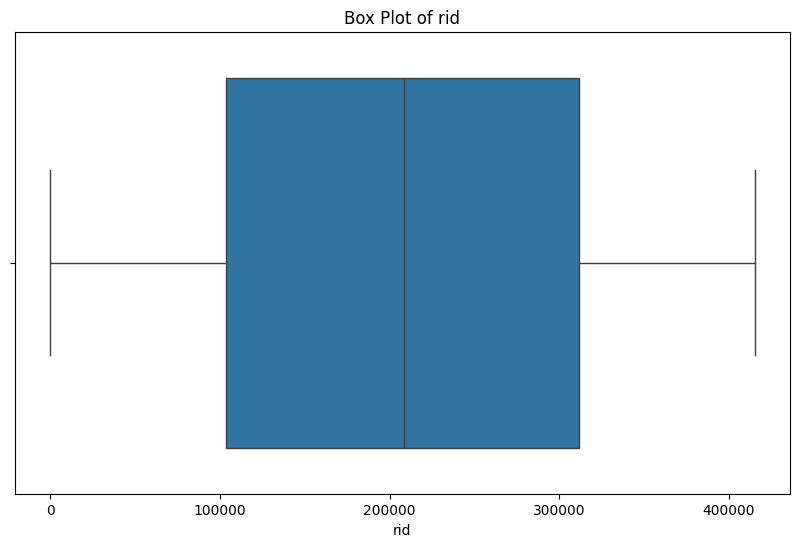

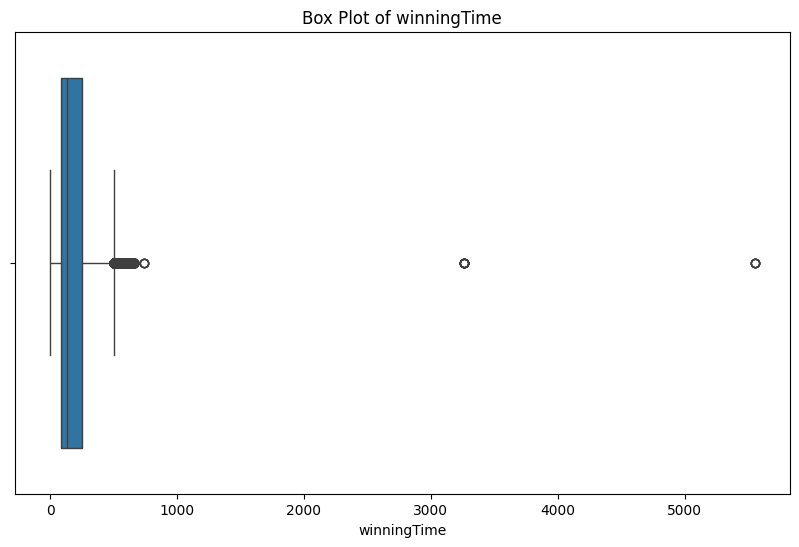

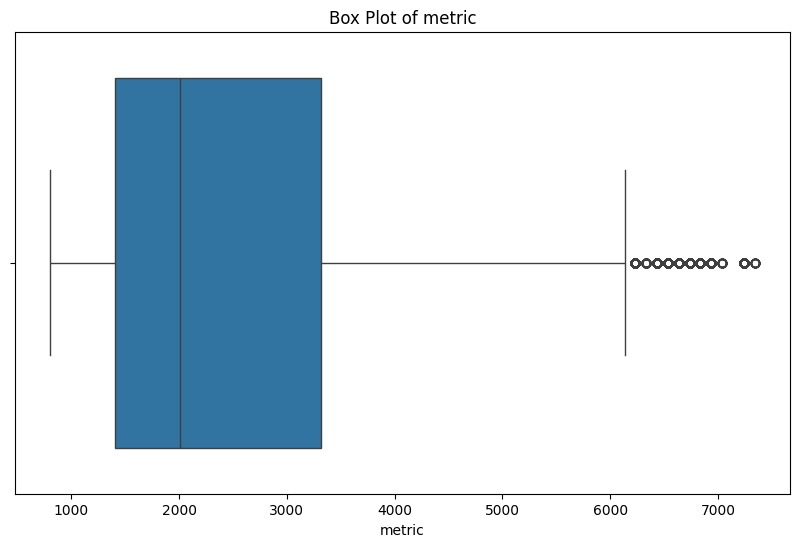

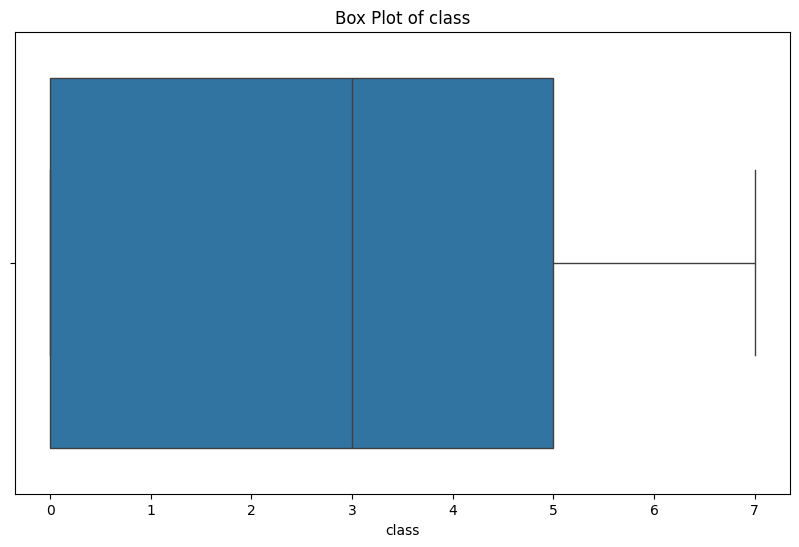

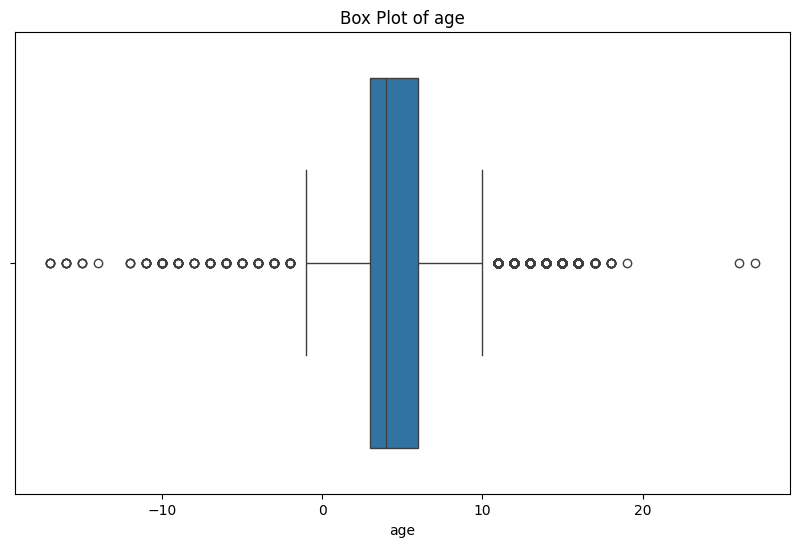

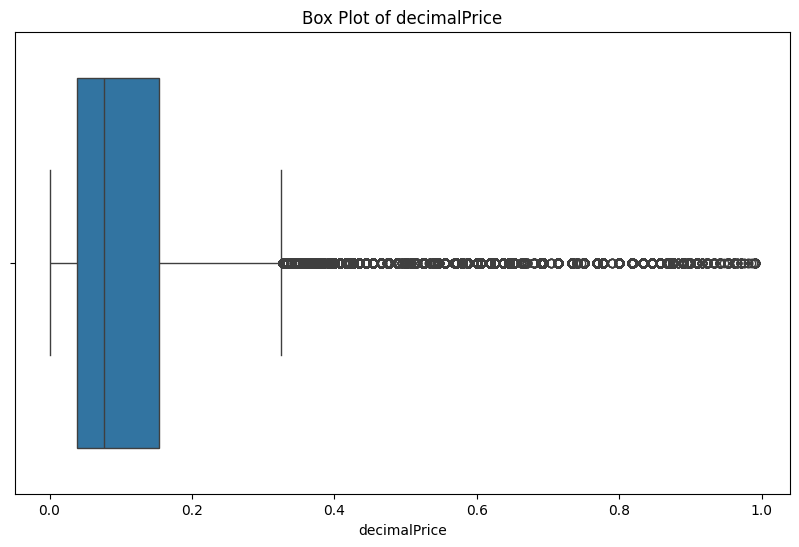

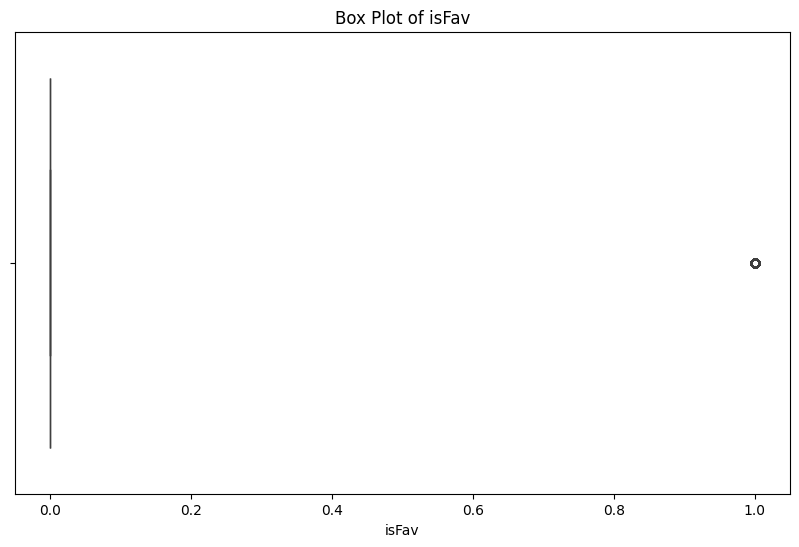

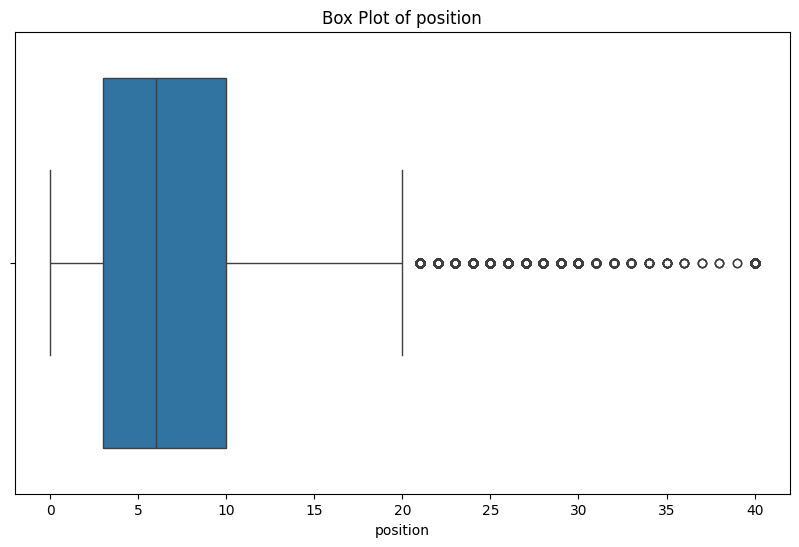

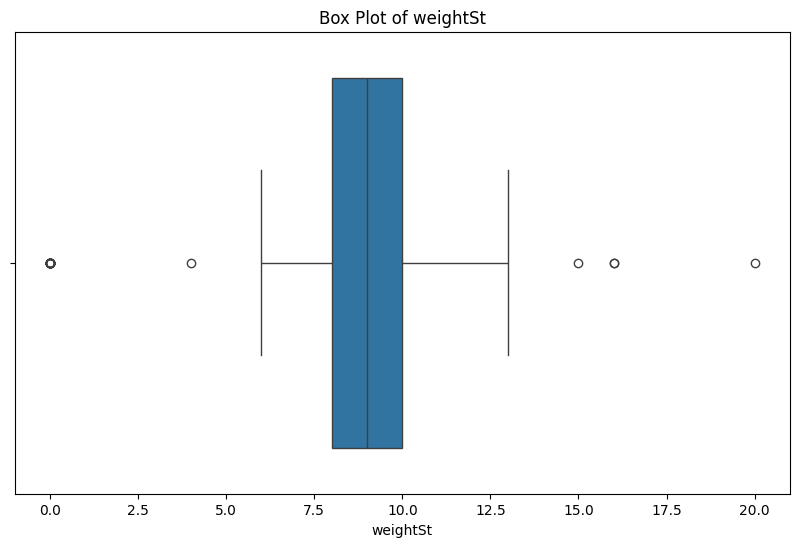

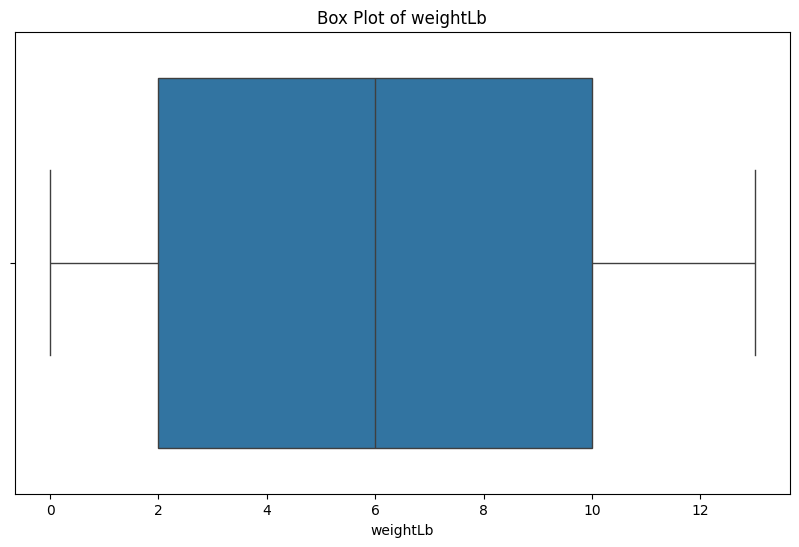

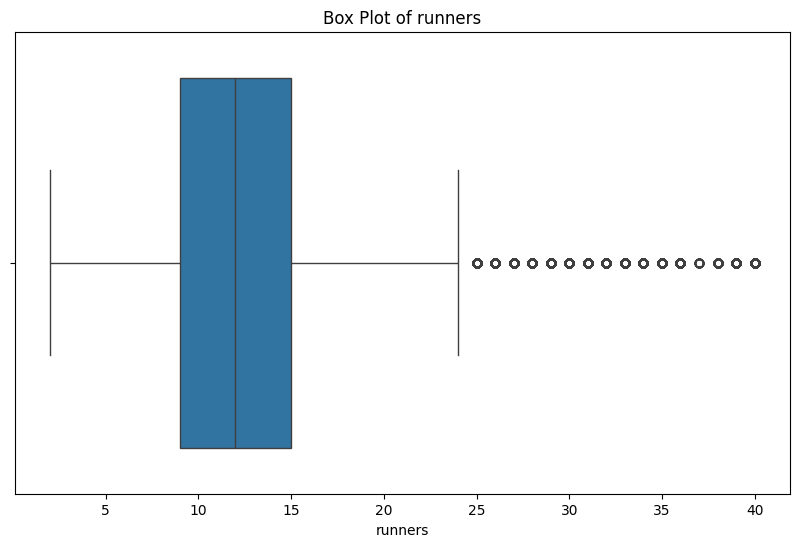

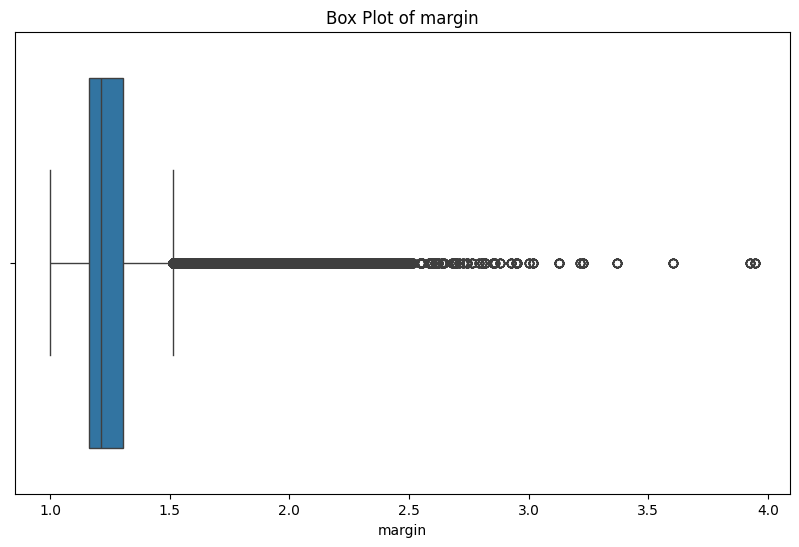

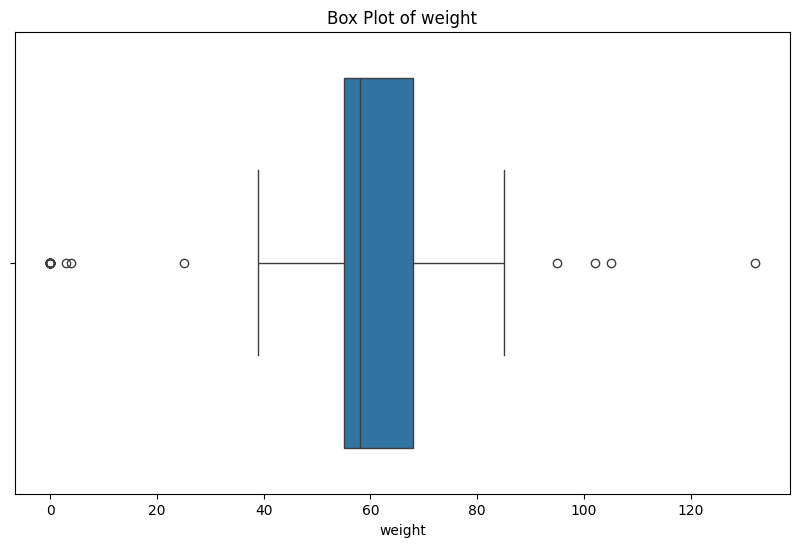

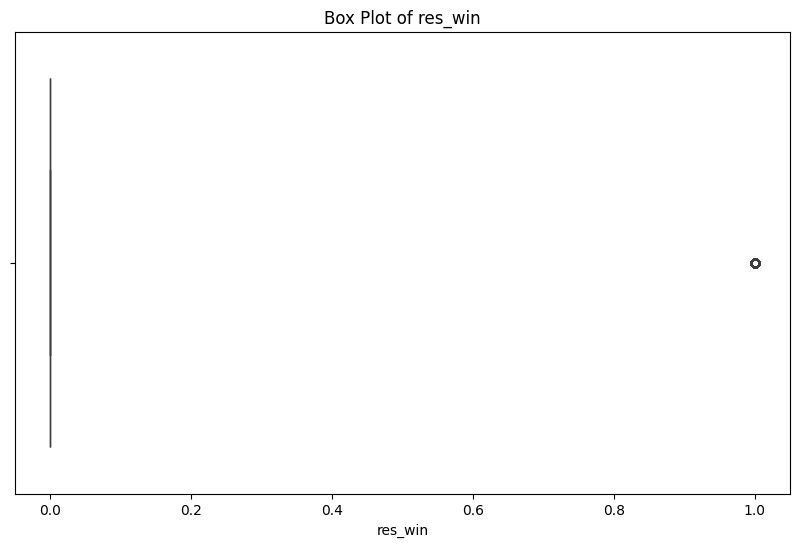

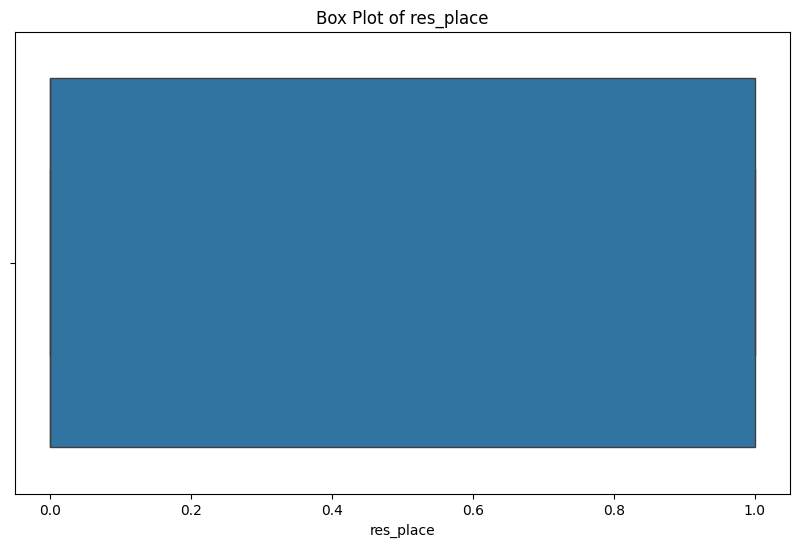

In [23]:
continuous_vars = merged_data.select_dtypes(include=np.number).columns

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=merged_data[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

In [24]:
print(merged_data[continuous_vars].dtypes)

rid               int64
winningTime     float64
metric          float64
class             int64
age             float64
decimalPrice    float64
isFav             int64
position          int64
weightSt          int64
weightLb          int64
runners           int64
margin          float64
weight            int64
res_win         float64
res_place       float64
dtype: object


**Split the Data**

In [25]:
# Convert 'time' and 'distance' columns to numeric
merged_data['time'] = pd.to_numeric(merged_data['time'], errors='coerce')
merged_data['distance'] = pd.to_numeric(merged_data['distance'], errors='coerce')

In [26]:
# Selecting relevant continuous features and the target variable
continuous_vars = ['time', 'distance', 'winningTime', 'age', 'decimalPrice',
                   'weightSt', 'weightLb', 'runners', 'margin', 'weight']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(merged_data[continuous_vars])
y = merged_data['position']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['time' 'distance']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=1)

In [28]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3696583, 8)
X_test shape: (410732, 8)
y_train shape: (3696583,)
y_test shape: (410732,)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")

Train MSE: 75.2125
Test MSE: 74.7610
Train R^2: 0.1609
Test R^2: 0.1606


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform

# Define the parameter grid
param_dist = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'positive': [True, False],       # When set to True, forces the coefficients to be positive
}

# Initialize the model
lr_model = LinearRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(lr_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=1, n_jobs=-1)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'positive': False, 'fit_intercept': True}
Best RMSE: 8.672546615460064
